In [1]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

Simulating wiretap channel...
Analyzing Y uniformity...


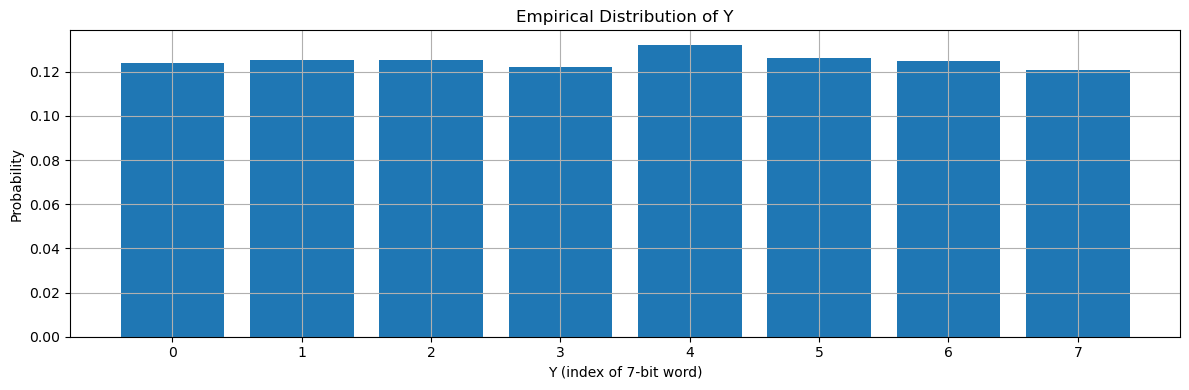

Analyzing Z uniformity...


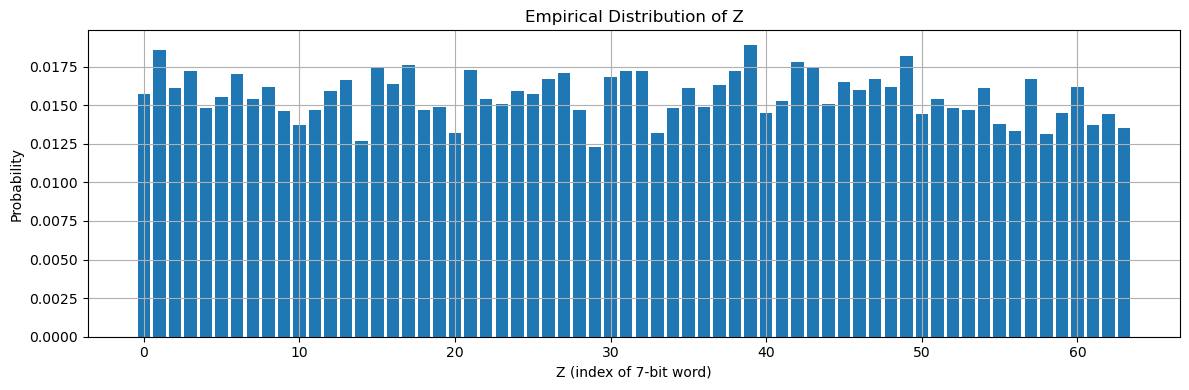

Estimating mutual information I(Y; Z | X)...
Estimated mutual information I(Y; Z | X = 1001000) = 0.035745 bits


In [2]:
# Generate all 7-bit binary strings
def generate_all_7bit_words():
    return [format(i, '07b') for i in range(128)]

# Hamming distance between two binary strings
def hamming_distance(a, b):
    return sum(x != y for x, y in zip(a, b))

# Ty|x(a): all strings with Hamming distance ≤ 1
def Ty_given_x(a):
    return [b for b in generate_all_7bit_words() if hamming_distance(a, b) <= 1]

# Tz|x(a): all strings with Hamming distance ≤ 3
def Tz_given_x(a):
    return [c for c in generate_all_7bit_words() if hamming_distance(a, c) <= 3]

# Wiretap channel simulator
def wiretap_channel(x, num_trials=10000):
    y_samples = []
    z_samples = []

    Ty = Ty_given_x(x)
    Tz = Tz_given_x(x)

    for _ in range(num_trials):
        y = random.choice(Ty)
        z = random.choice(Tz)
        y_samples.append(y)
        z_samples.append(z)

    return y_samples, z_samples

# Analyze uniformity of a list of outcomes
def analyze_uniformity(samples, label):
    counter = Counter(samples)
    total = len(samples)
    probs = {k: v / total for k, v in counter.items()}

    plt.figure(figsize=(12, 4))
    plt.bar(range(len(probs)), list(probs.values()))
    plt.title(f"Empirical Distribution of {label}")
    plt.xlabel(f"{label} (index of 7-bit word)")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return probs

# Compute mutual information estimate I(y; z | x)
def estimate_mutual_information(y_samples, z_samples):
    joint_counts = Counter(zip(y_samples, z_samples))
    y_counts = Counter(y_samples)
    z_counts = Counter(z_samples)
    N = len(y_samples)

    mi = 0.0
    for (y, z), joint in joint_counts.items():
        p_yz = joint / N
        p_y = y_counts[y] / N
        p_z = z_counts[z] / N
        mi += p_yz * np.log2(p_yz / (p_y * p_z))

    return mi

# Main execution
if __name__ == "__main__":
    fixed_input = '1001000'
    num_trials = 10000

    print("Simulating wiretap channel...")
    y_samples, z_samples = wiretap_channel(fixed_input, num_trials)

    print("Analyzing Y uniformity...")
    y_probs = analyze_uniformity(y_samples, "Y")

    print("Analyzing Z uniformity...")
    z_probs = analyze_uniformity(z_samples, "Z")

    print("Estimating mutual information I(Y; Z | X)...")
    mi_est = estimate_mutual_information(y_samples, z_samples)
    print(f"Estimated mutual information I(Y; Z | X = {fixed_input}) = {mi_est:.6f} bits")